In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [4]:
# use chest and wrist features for classification
scores_all = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8312116925978312
f1 score:  0.8340560968887213

subject  3
accuracy:  0.8124419684308264
f1 score:  0.8111784147826892

subject  4
accuracy:  0.8595842956120092
f1 score:  0.8204335559862839

subject  5
accuracy:  0.9097880018042399
f1 score:  0.9101194369149994

subject  6
accuracy:  0.8524069028156221
f1 score:  0.8541462878317791

subject  7
accuracy:  0.8544131028207461
f1 score:  0.8150402336882288

subject  8
accuracy:  0.5901268115942029
f1 score:  0.6028177845972208

subject  9
accuracy:  0.9258079198907602
f1 score:  0.9206212872616498

subject  10
accuracy:  0.7992973210364515
f1 score:  0.7454912946819691

subject  11
accuracy:  0.9568926807364168
f1 score:  0.956677932646033

subject  13
accuracy:  0.7964959568733153
f1 score:  0.7452238076124345

subject  14
accuracy:  0.6084418500224518
f1 score:  0.6199514450901371

subject  15
accuracy:  0.8163905060456784
f1 score:  0.7482242112257915

subject  16
accuracy:  0.9819900945520036
f1 score:  0.98193

In [5]:
np.array(scores_all)[:,1].mean() #accuracy

0.8139390158933478

In [6]:
np.array(scores_all)[:,1].std()

0.11797836351956276

In [7]:
np.array(scores_all)[:,2].mean() #f1-score

0.796077553770969

In [8]:
np.array(scores_all)[:,2].std()

0.12094475030583993

### Confusion Matrices per subject and for all subjects combined

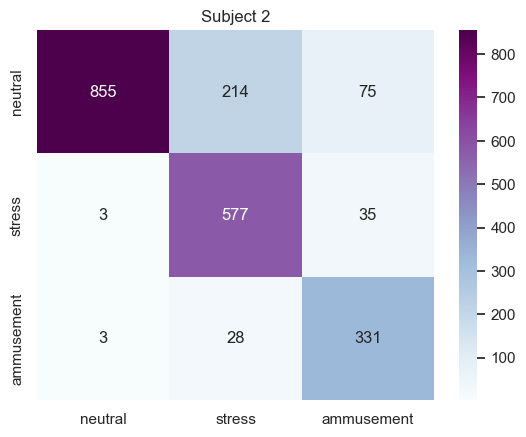

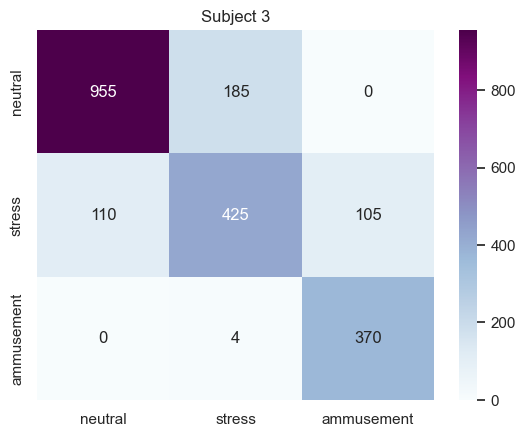

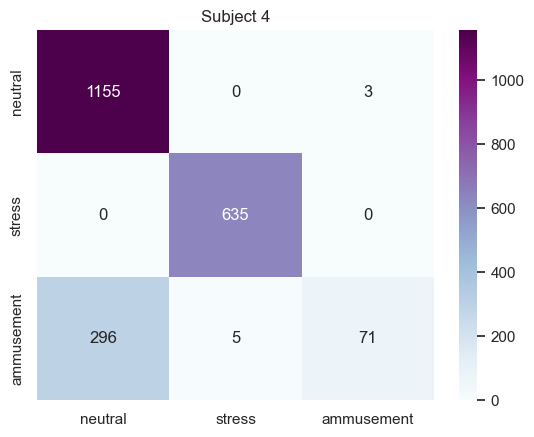

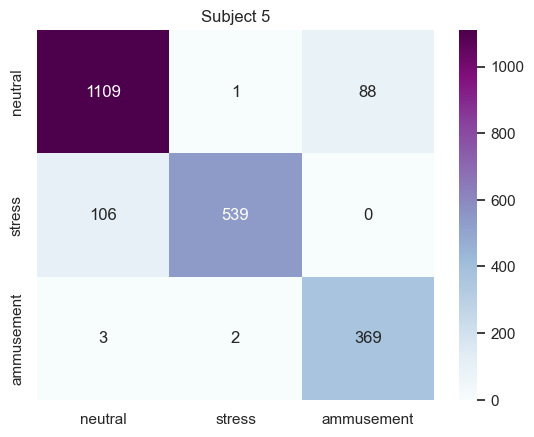

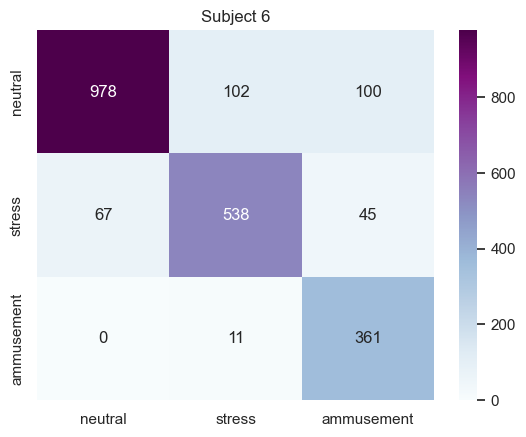

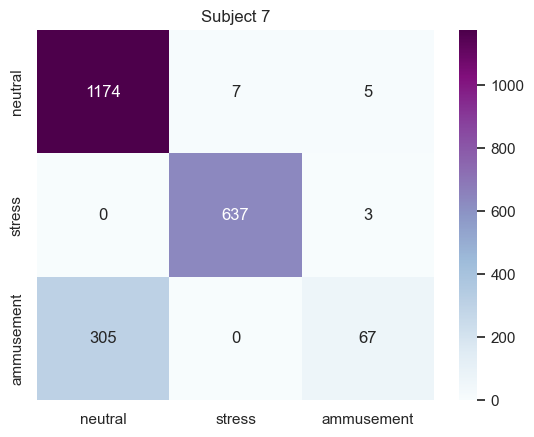

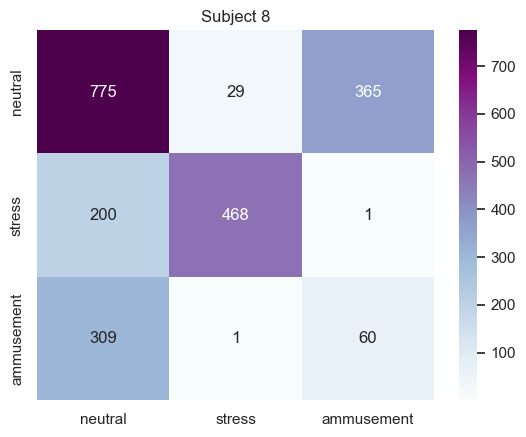

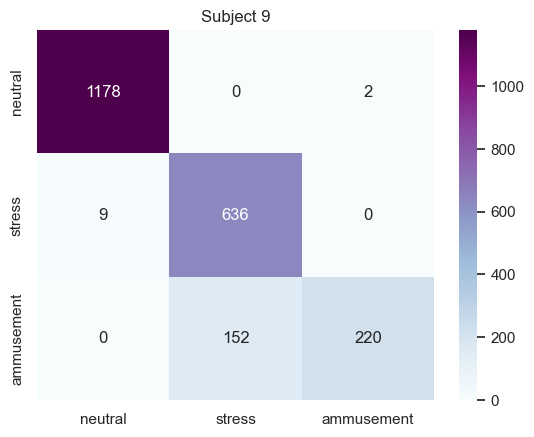

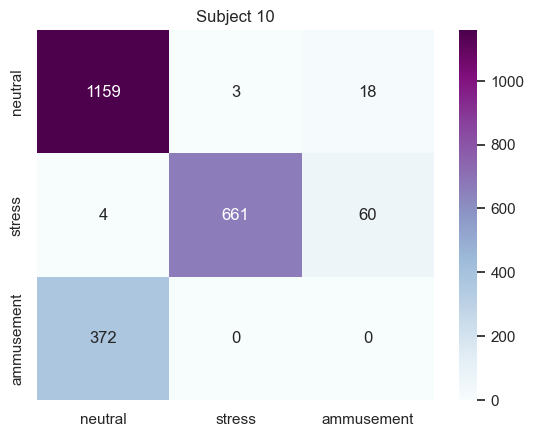

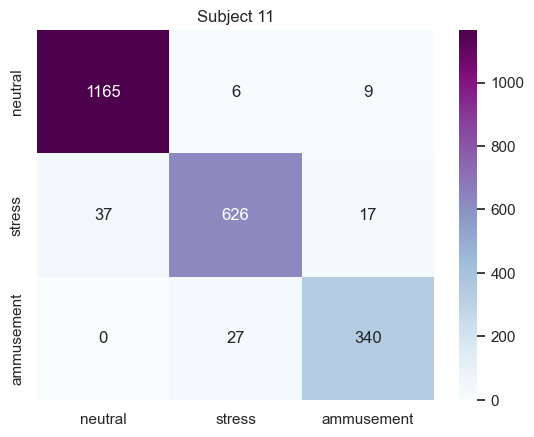

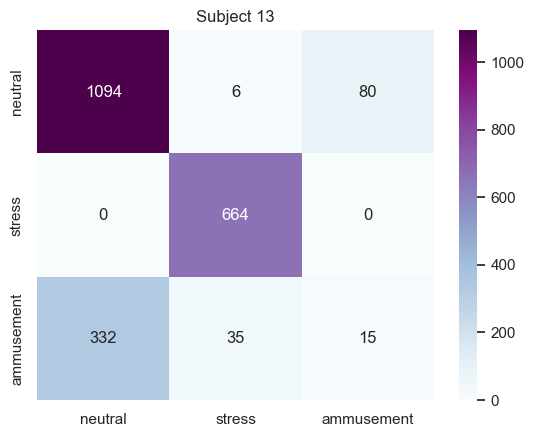

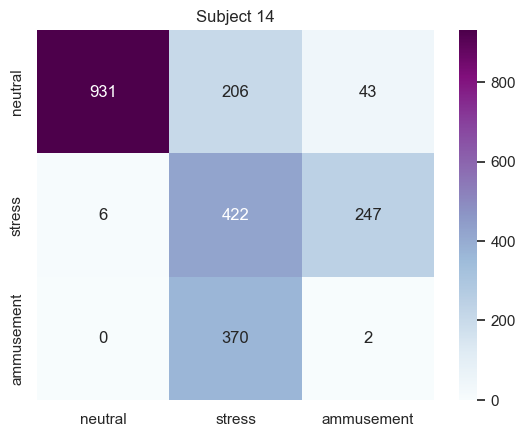

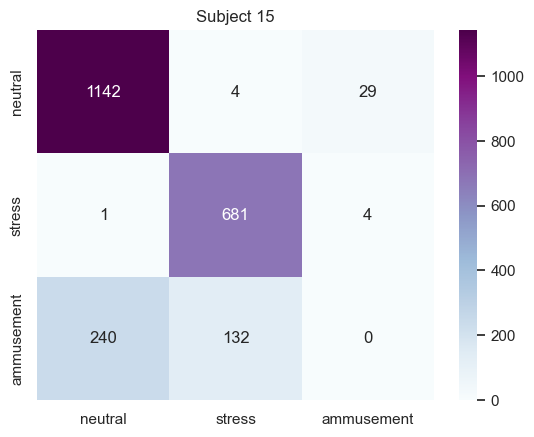

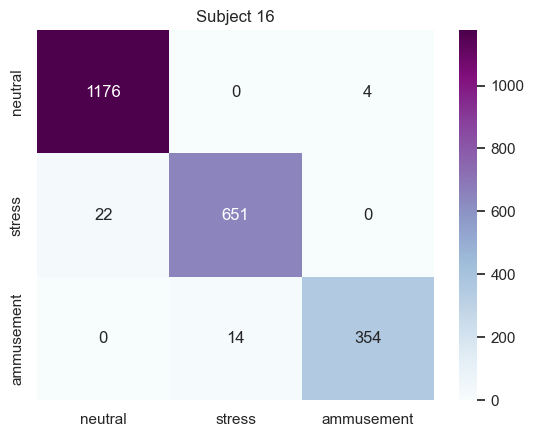

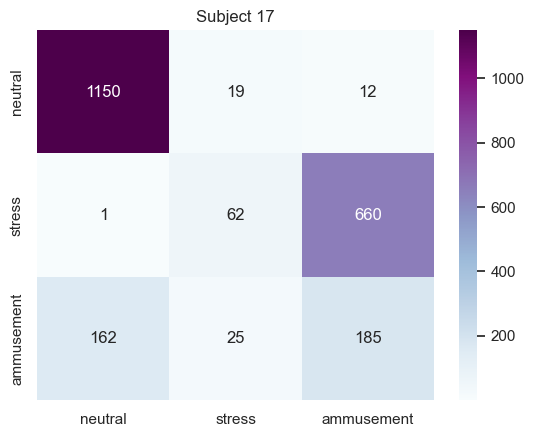

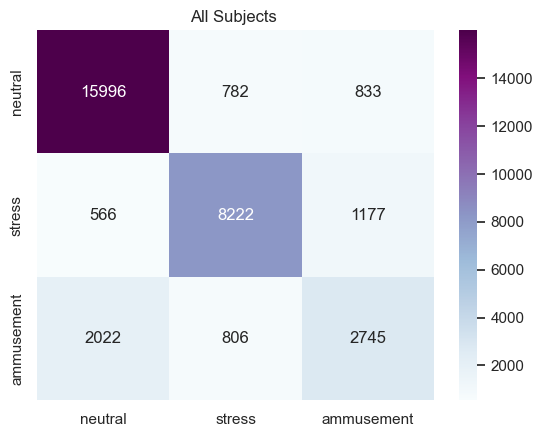

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [10]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.6784535596416784
f1 score:  0.6854421230467361

subject  3
accuracy:  0.7896935933147632
f1 score:  0.785831453401859

subject  4
accuracy:  0.7976905311778291
f1 score:  0.744727349258843

subject  5
accuracy:  0.821831303563374
f1 score:  0.8125895708604376

subject  6
accuracy:  0.7606721162579473
f1 score:  0.7525182029879067

subject  7
accuracy:  0.8202911737943585
f1 score:  0.7587730480655072

subject  8
accuracy:  0.4302536231884058
f1 score:  0.44146760905440524

subject  9
accuracy:  0.81474738279472
f1 score:  0.7600202840143917

subject  10
accuracy:  0.8603425559947299
f1 score:  0.8437957081725512

subject  11
accuracy:  0.9268073641670409
f1 score:  0.9274625033865214

subject  13
accuracy:  0.8234501347708895
f1 score:  0.7708880978421698

subject  14
accuracy:  0.7238437359676695
f1 score:  0.727719086557917

subject  15
accuracy:  0.7590685176892074
f1 score:  0.7271465193998616

subject  16
accuracy:  0.9644304367402071
f1 score:  0.963817699

In [11]:
np.array(scores_c)[:,1].mean() #accuracy

0.7894055958449613

In [12]:
np.array(scores_c)[:,1].std()

0.11893457065816383

In [13]:
np.array(scores_c)[:,2].mean() #f1-score

0.7696002662628293

In [14]:
np.array(scores_c)[:,2].std()

0.11398888491219146

### Confusion Matrices per subject and for all subjects combined

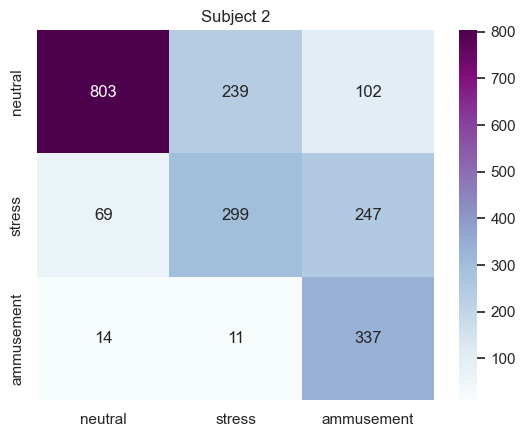

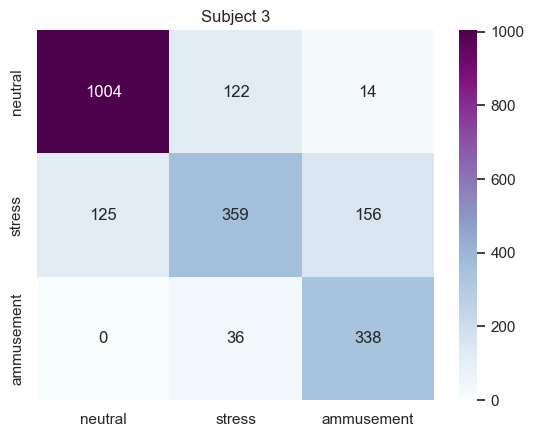

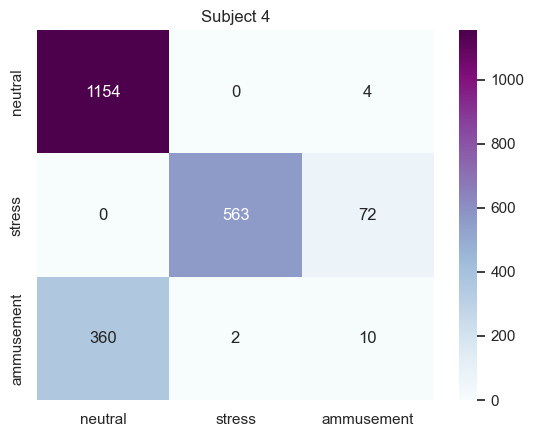

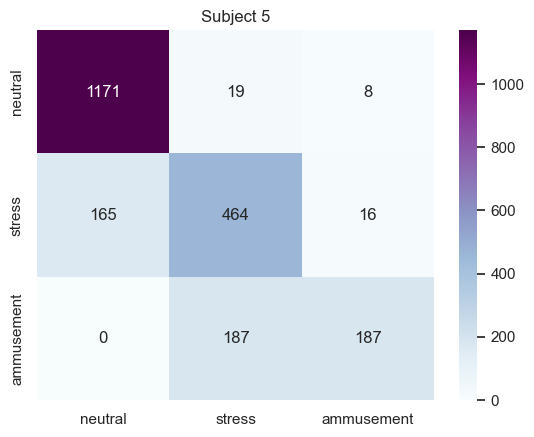

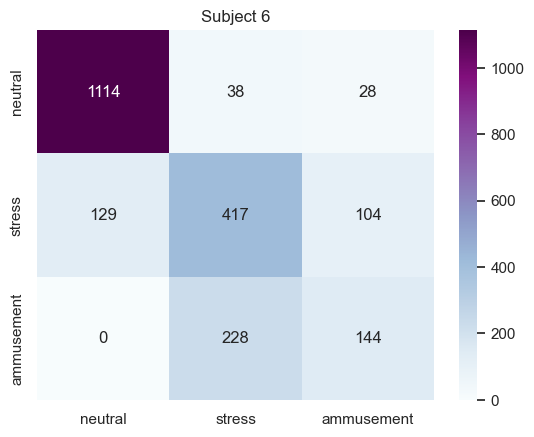

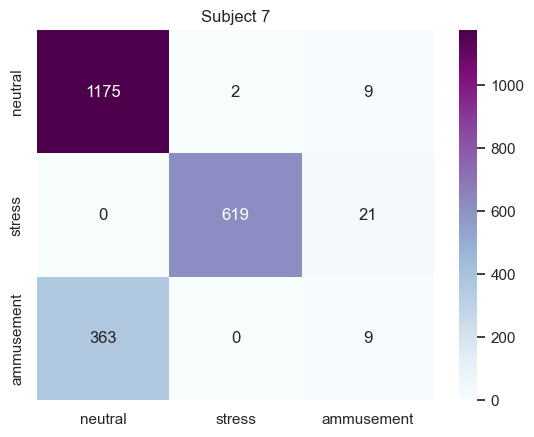

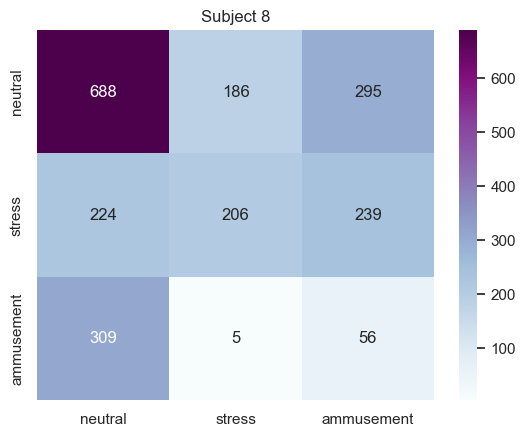

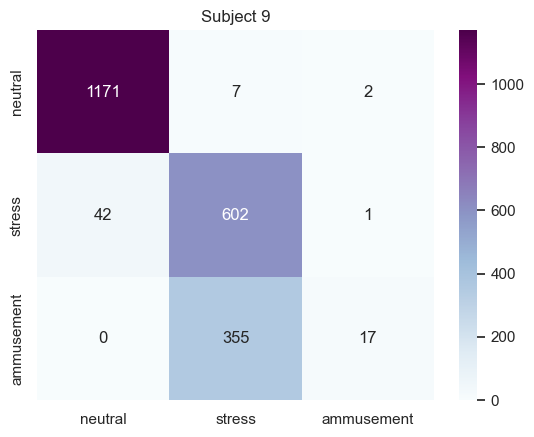

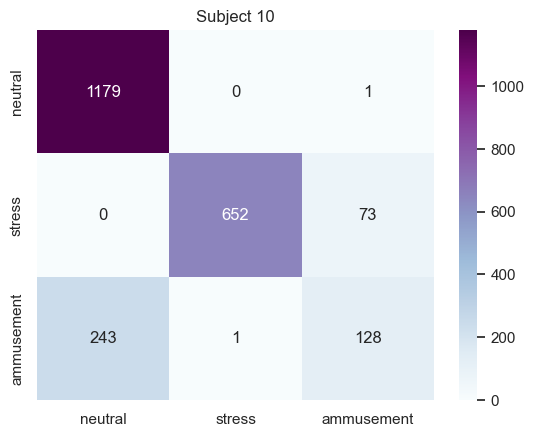

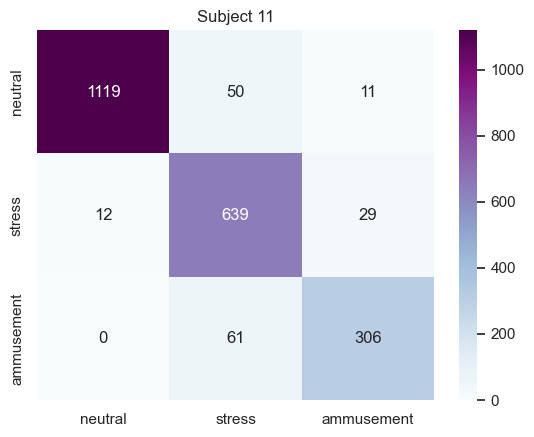

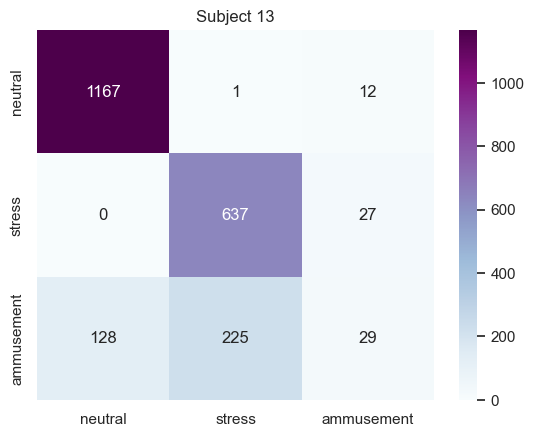

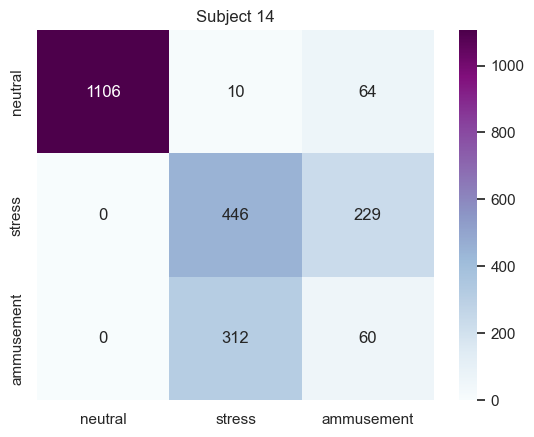

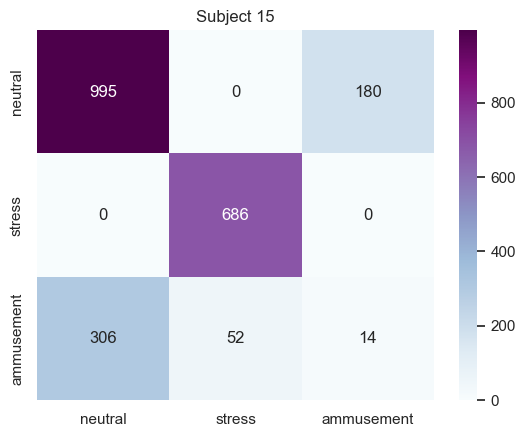

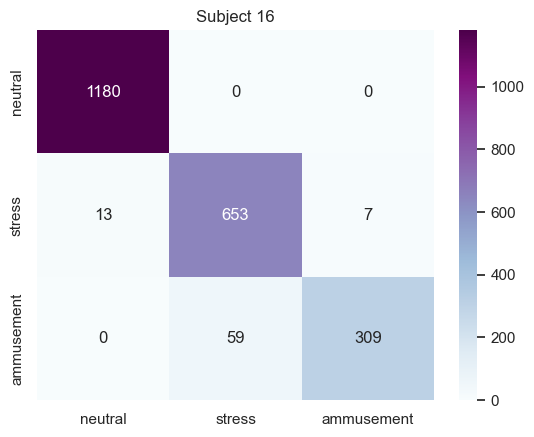

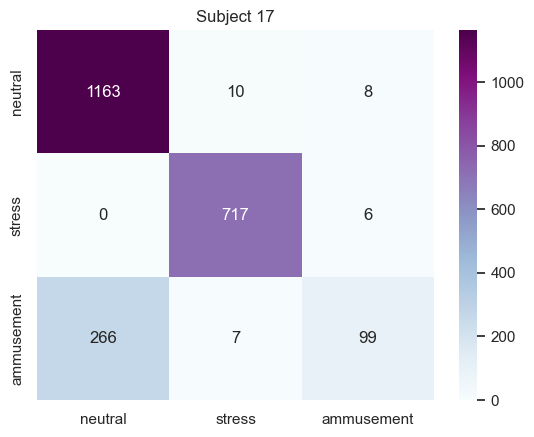

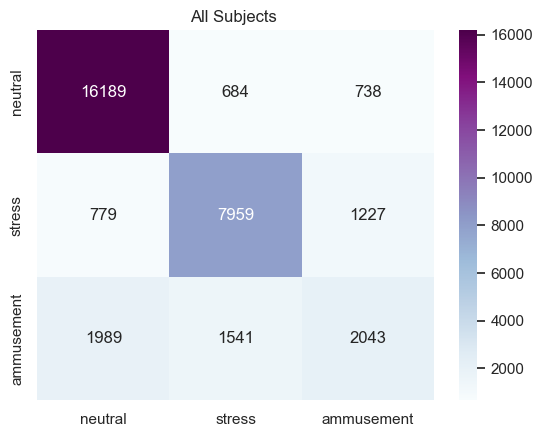

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [16]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = MLPClassifier(activation = 'tanh', hidden_layer_sizes=10,learning_rate_init=0.1, max_iter=5000,random_state=42,solver='adam')
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.7232437529467233
f1 score:  0.6678815700903006

subject  3
accuracy:  0.7358402971216341
f1 score:  0.7283562922887981

subject  4
accuracy:  0.6355658198614319
f1 score:  0.641528834236623

subject  5
accuracy:  0.6170500676589986
f1 score:  0.6334976122133937

subject  6
accuracy:  0.8147138964577657
f1 score:  0.8173956519824577

subject  7
accuracy:  0.8343949044585988
f1 score:  0.8381673516076893

subject  8
accuracy:  0.8097826086956522
f1 score:  0.7436703797199218

subject  9
accuracy:  0.8652708238507055
f1 score:  0.864678574312911

subject  10
accuracy:  0.645147123407993
f1 score:  0.6504919696688485

subject  11
accuracy:  0.6744499326448137
f1 score:  0.6571148423187234

subject  13
accuracy:  0.779874213836478
f1 score:  0.7571337090703677

subject  14
accuracy:  0.5711719802424786
f1 score:  0.5410312370432185

subject  15
accuracy:  0.5338110165696373
f1 score:  0.5546866151048346

subject  16
accuracy:  0.7726249437190454
f1 score:  0.77520073

In [17]:
np.array(scores_w)[:,1].mean() #accuracy

0.7042605326370878

In [18]:
np.array(scores_w)[:,1].std()

0.10485393389057115

In [19]:
np.array(scores_w)[:,1].mean() #f1-score

0.7042605326370878

In [20]:
np.array(scores_w)[:,1].std()

0.10485393389057115

### Confusion Matrices per subject and for all subjects combined

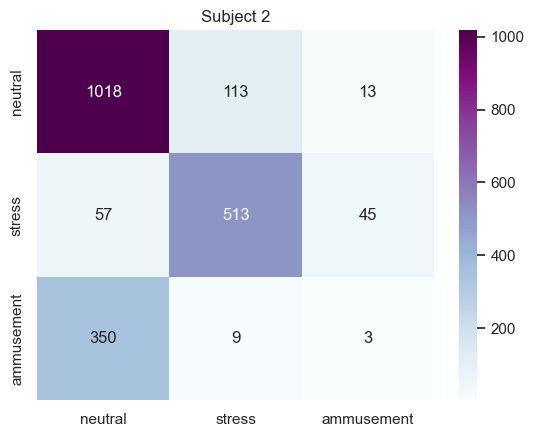

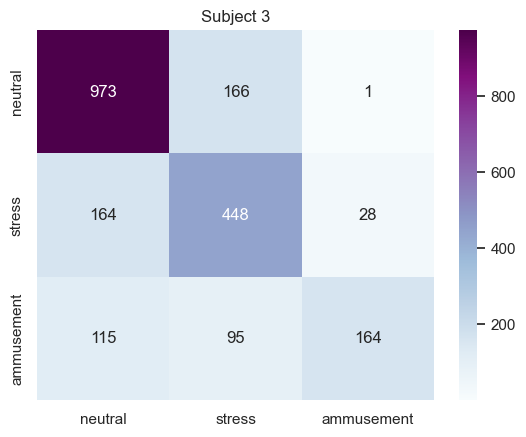

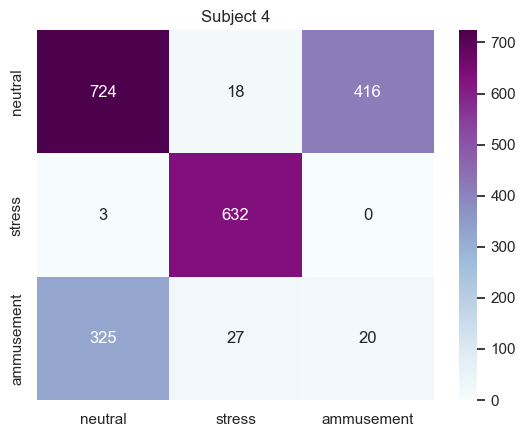

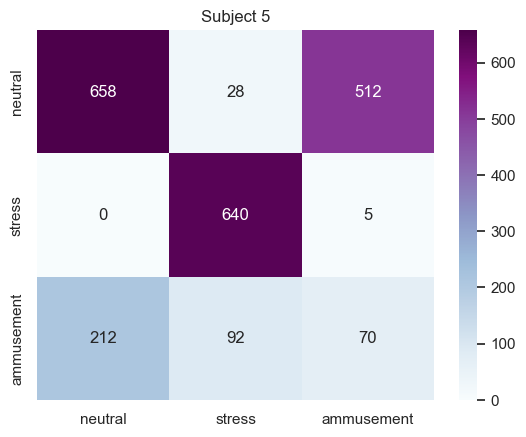

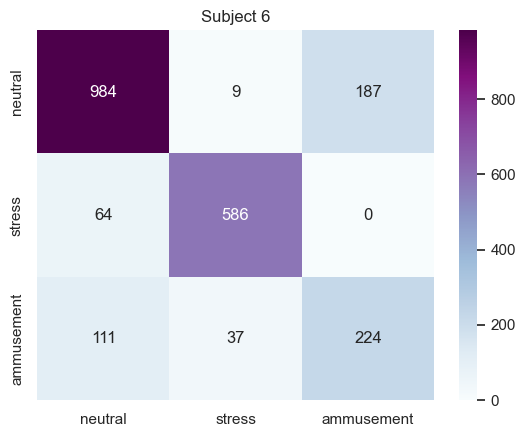

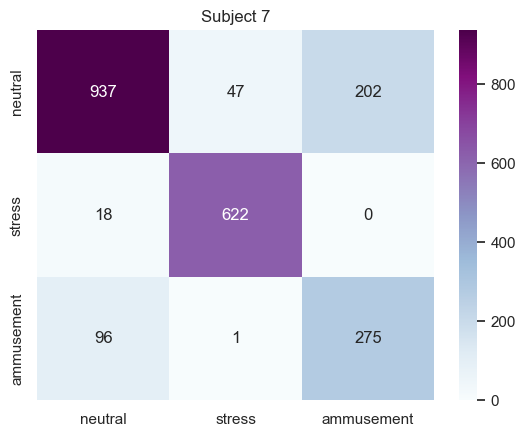

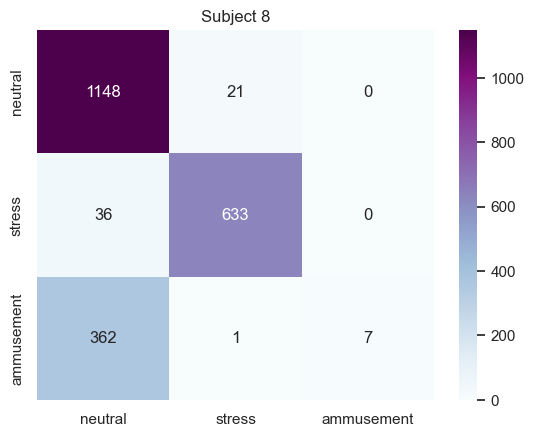

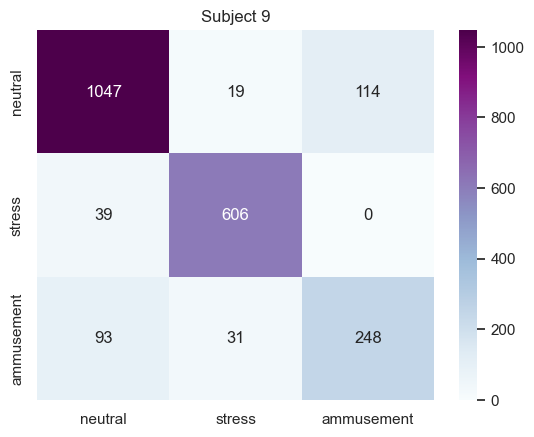

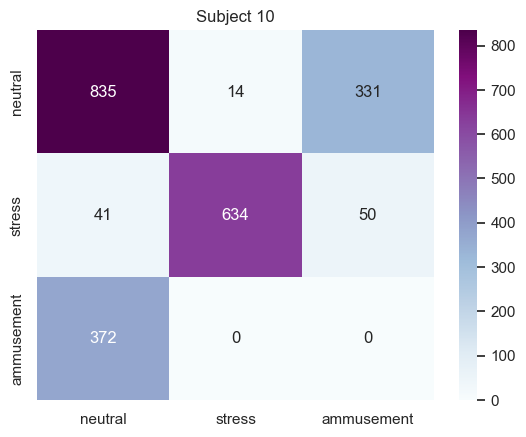

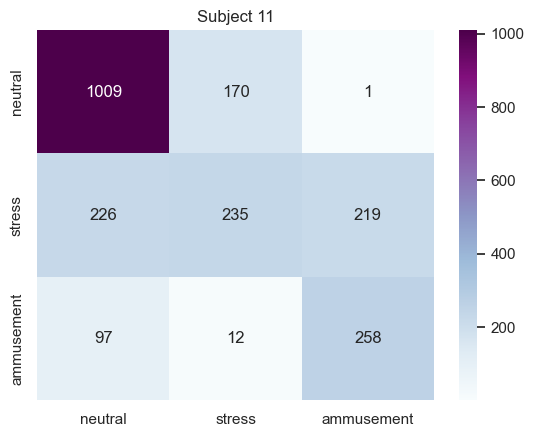

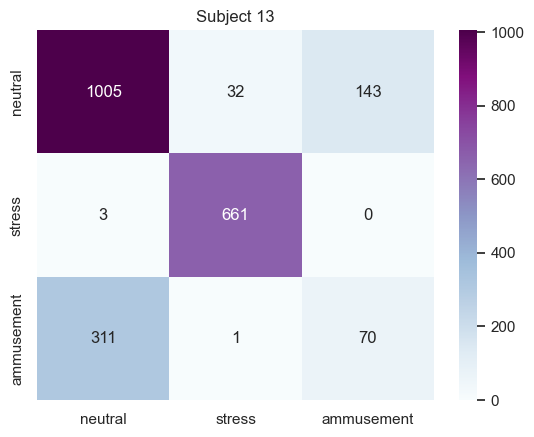

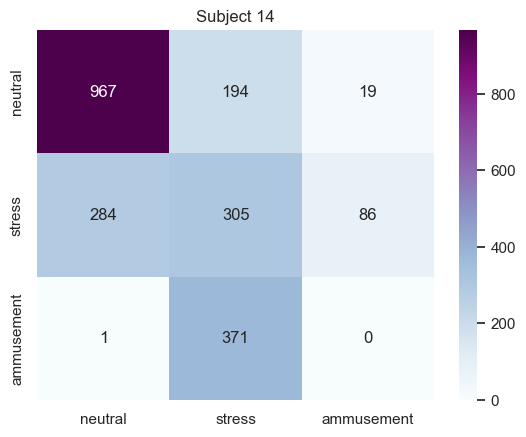

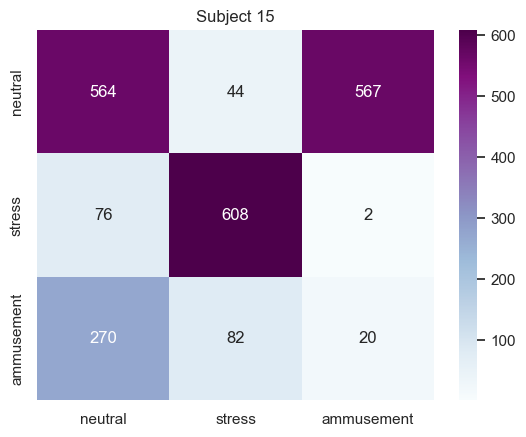

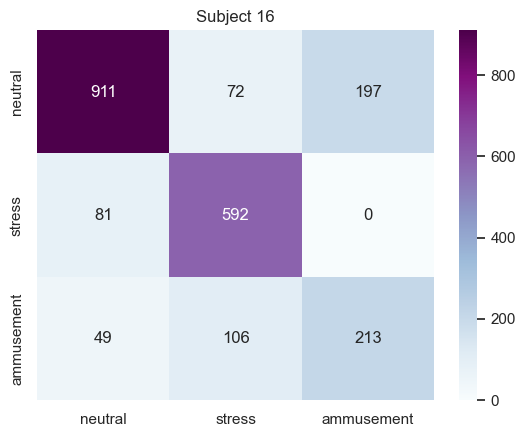

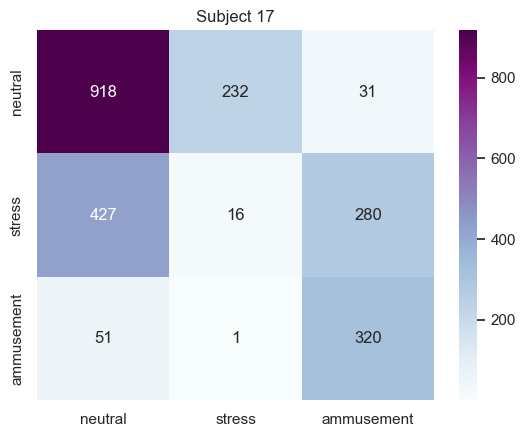

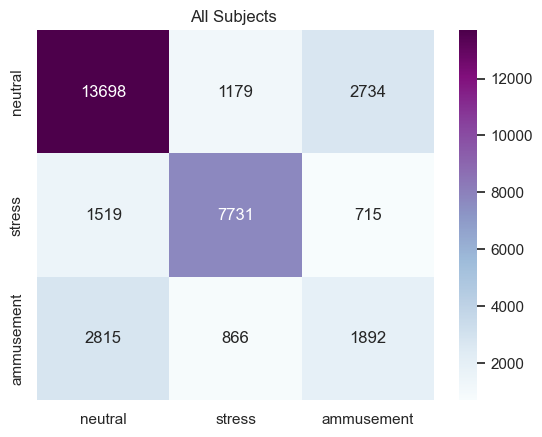

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

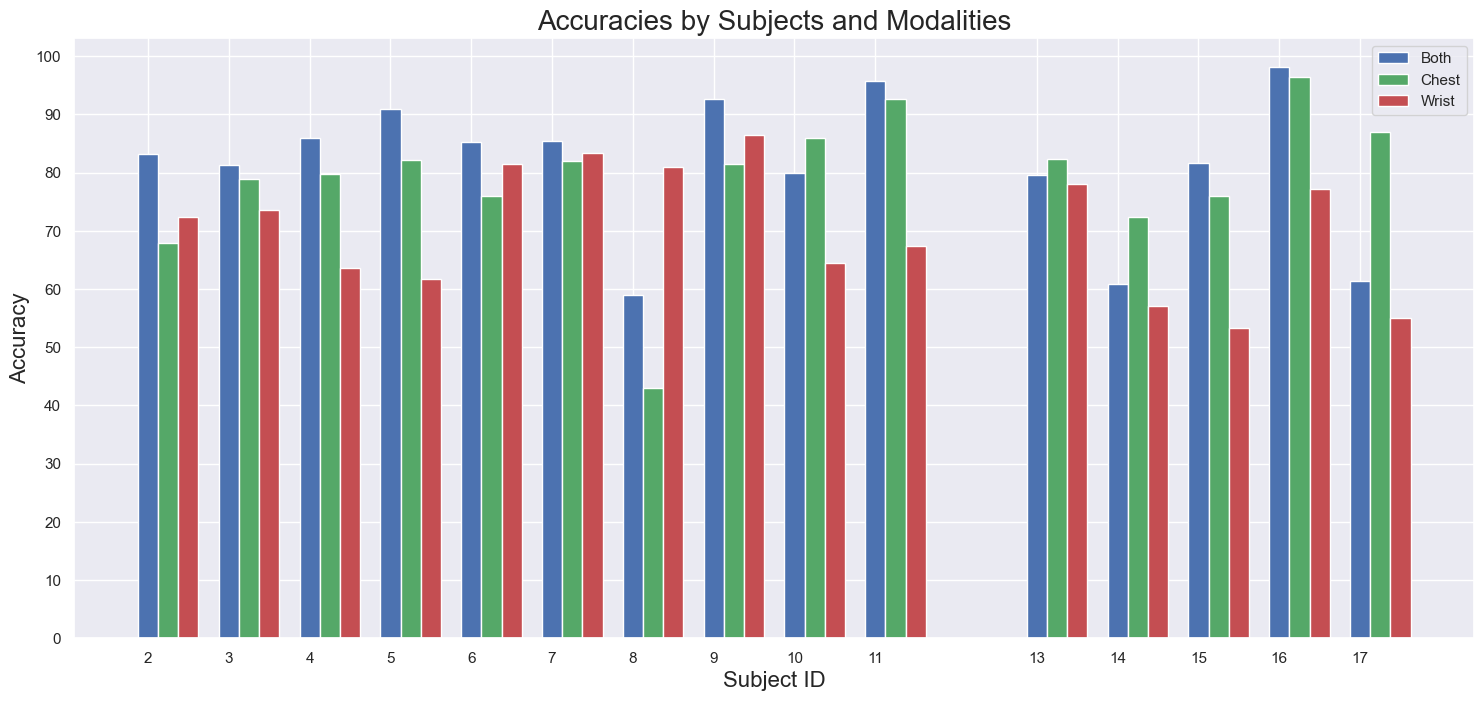

In [22]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

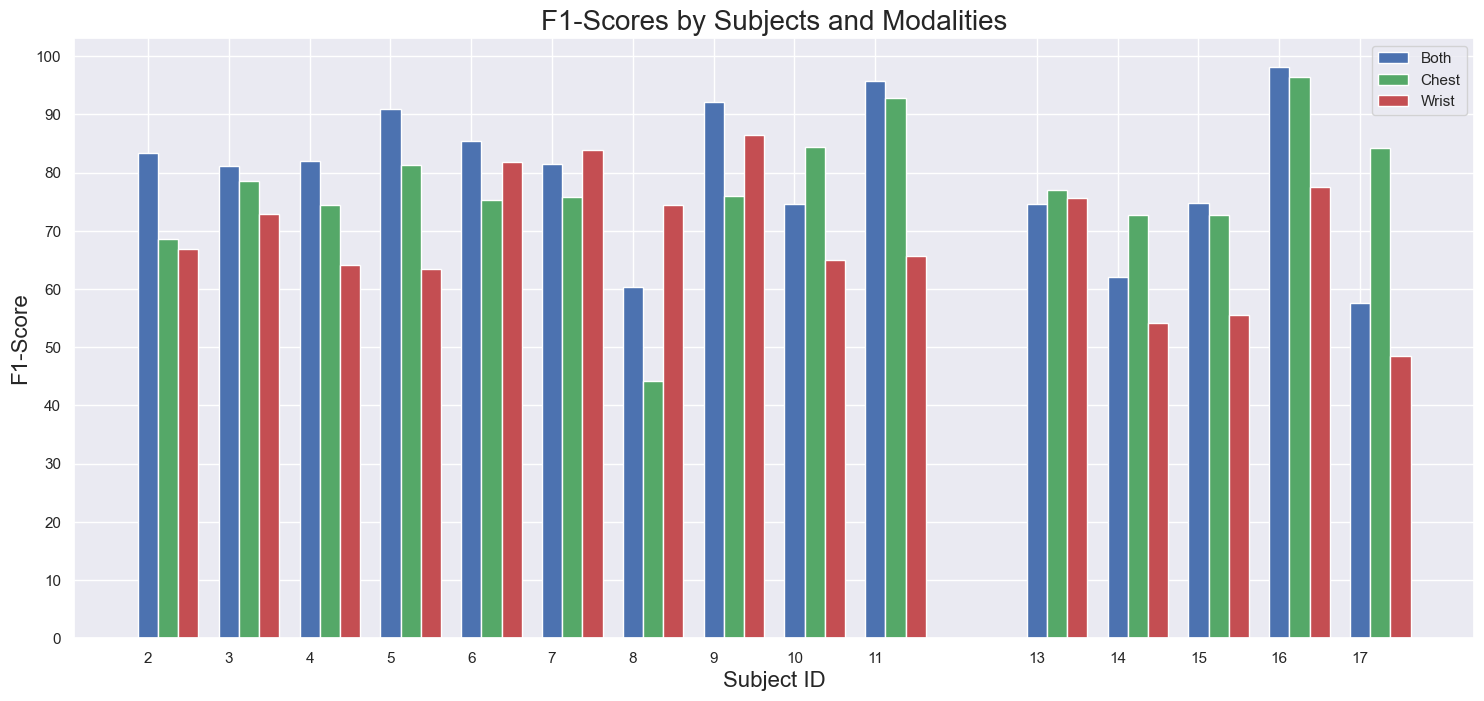

In [23]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])